In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = data.iloc[:,2:4].values

In [4]:
X.shape

(400, 2)

In [5]:
y = data.iloc[:,-1].values

In [6]:
y.shape

(400,)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [8]:
X_train.shape

(320, 2)

In [9]:
X_test.shape

(80, 2)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.54152407,  2.35139448],
       [-0.16171541,  0.85582731],
       [ 0.21809326, -0.37581623],
       [ 2.02218442, -0.81568893],
       [ 0.97771059,  1.88219694],
       [-0.06676324,  0.24000554],
       [ 0.02818892,  0.03473161],
       [-0.06676324, -0.229192  ],
       [ 0.69285409, -1.28488647],
       [-1.68095007, -0.99163801],
       [-0.35161974,  0.06405646],
       [ 1.45247142,  0.06405646],
       [ 0.88275842, -0.55176531],
       [-0.82638057, -0.6690647 ],
       [-0.92133274, -0.75703924],
       [-0.92133274, -0.43446593],
       [ 0.21809326,  0.03473161],
       [ 0.02818892,  1.23705032],
       [-1.39609357, -0.11189262],
       [ 0.88275842, -1.37286101],
       [-0.16171541,  2.1754454 ],
       [ 0.31304542,  0.06405646],
       [-0.82638057,  0.38662977],
       [-0.44657191, -1.22623678],
       [-1.8708544 ,  0.35730493],
       [-0.44657191, -0.02391808],
       [ 0.02818892,  0.03473161],
       [-0.25666757, -1.37286101],
       [-1.5859979 ,

In [13]:
X_test= scaler.transform(X_test)
X_test

array([[-3.70353959, -2.04731598],
       [-3.3879826 , -2.04736758],
       [-3.55928497, -2.04732802],
       [-3.66747593, -2.04732458],
       [-3.66747593, -2.04732028],
       [-3.74861916, -2.04737618],
       [-3.68550776, -2.0473478 ],
       [-3.73960324, -2.04732888],
       [-3.451094  , -2.04727384],
       [-3.59534862, -2.04732802],
       [-3.48715766, -2.04727986],
       [-3.60436454, -2.04731684],
       [-3.64042819, -2.04731598],
       [-3.49617357, -2.04726869],
       [-3.60436454, -2.0473306 ],
       [-3.64944411, -2.04731598],
       [-3.60436454, -2.04733146],
       [-3.62239636, -2.04735554],
       [-3.49617357, -2.04729534],
       [-3.68550776, -2.04736242],
       [-3.59534862, -2.04736414],
       [-3.49617357, -2.04735554],
       [-3.64944411, -2.0473779 ],
       [-3.43306217, -2.04730308],
       [-3.43306217, -2.04737016],
       [-3.57731679, -2.04734006],
       [-3.55928497, -2.04732544],
       [-3.73960324, -2.047322  ],
       [-3.60436454,

In [14]:
# 1 st method 
np.sqrt(X_train.shape[0])

17.88854381999832

In [15]:
k = 17

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [18]:
# Train our model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [20]:
y_pred = knn.predict(X_test)
y_pred.shape

(80,)

In [21]:
y_test.shape

(80,)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6375

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[51,  0],
       [29,  0]])

In [24]:
# Effect of trainning error and Validation Error rate 

error_train =[]
error_test =[]

for i in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    x = confusion_matrix(y_train, knn.predict(X_train))
    y = confusion_matrix(y_test, knn.predict(X_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())

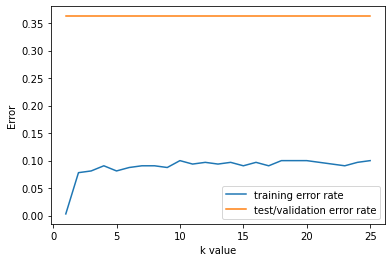

In [25]:
plt.plot(range(1,26), error_train, label = 'training error rate')
plt.plot(range(1,26), error_test, label = 'test/validation error rate')
plt.xlabel('k value')
plt.ylabel('Error')
plt.legend()

In [26]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [27]:
y_pred = knn.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.6375

In [29]:
def predict_output():
    age = int(input('Enter the age'))
    salary = int(input('Enter the salary'))
    
    X_new = np.array([[age],[salary]]).reshape(1,2)
    X_new = scaler.transform(X_new)
    
    if knn.predict(X_new)[0]==0:
        return 'Will not purchase'
    else:
        return 'Will purchase'

In [30]:
predict_output()

Enter the age20
Enter the salary20000


'Will not purchase'

Few Observation

In [31]:
# 1. Hyperparameters

# 2. Method to choose K

# ---->Method 1 K=17
# ---->Method 2 K=11

Step 2: Creating a Meshgrid

In [35]:
a = np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b = np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)

XX, YY = np.meshgrid(a,b)

In [36]:
YY.shape

(599, 599)

Step3:Classifying every point on the meshgrid

In [37]:
input_array = np.array([XX.ravel(), YY.ravel()]).T

labels = knn.predict(input_array)

In [38]:
labels

array([0, 0, 0, ..., 1, 1, 1])

Step4: Plotting the array as an image

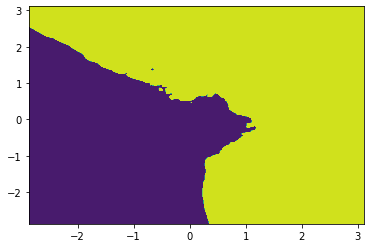

In [39]:
plt.contourf(XX, YY,labels.reshape(XX.shape))

Step5: Plotting all the training data on the plot

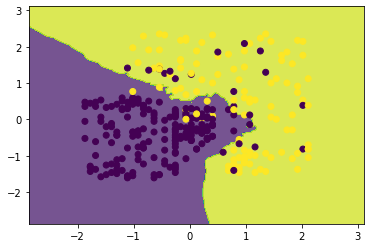

In [40]:
plt.contourf(XX, YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train)

Effect of K on Decision Boundary

In [44]:
from sklearn.neighbors import KNeighborsClassifier

def keffect(data,k):
    data=pd.read_csv('toy_datasets/{}'.format(data))
    X=data.iloc[:,:2].values
    y=data.iloc[:,-1].values
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=knn.predict(input_array)
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)

Dataset 1: Ushape

In [45]:
keffect('ushape.csv',1)

FileNotFoundError: [Errno 2] No such file or directory: 'toy_datasets/ushape.csv'

In [46]:
keffect('ushape.csv',5)

FileNotFoundError: [Errno 2] No such file or directory: 'toy_datasets/ushape.csv'